## Project Implementation

In [1]:
from scipy import stats
import latexify
import time
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
import pickle
import json
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import log_loss, classification_report, roc_auc_score, make_scorer
from scipy import stats
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
application_train = pd.read_csv('application_train.csv')        
application_test = pd.read_csv('application_test.csv')        
bureau = pd.read_csv('bureau.csv')                  
bureau_balance = pd.read_csv('bureau_balance.csv')            
credit_card_balance = pd.read_csv('credit_card_balance.csv')      
previous_application = pd.read_csv('previous_application.csv')     
installments_payments = pd.read_csv('installments_payments.csv')     
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')

## EDA

In [4]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
application_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [7]:
application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [8]:
application_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [9]:
application_test.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


In [10]:
application_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [11]:
application_train.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
application_train.isna()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
application_train.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


In [14]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Plots based on Gender

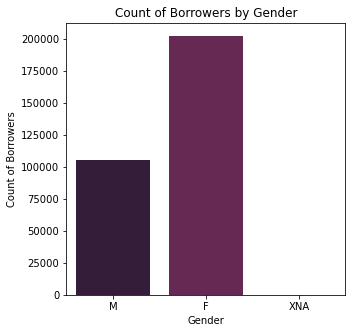

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
with sns.color_palette("rocket"):
    sns.countplot(data=application_train, x='CODE_GENDER')
plt.xlabel('Gender')
plt.ylabel('Count of Borrowers')
plt.title('Count of Borrowers by Gender')
plt.show()


## Plots based on Family Status

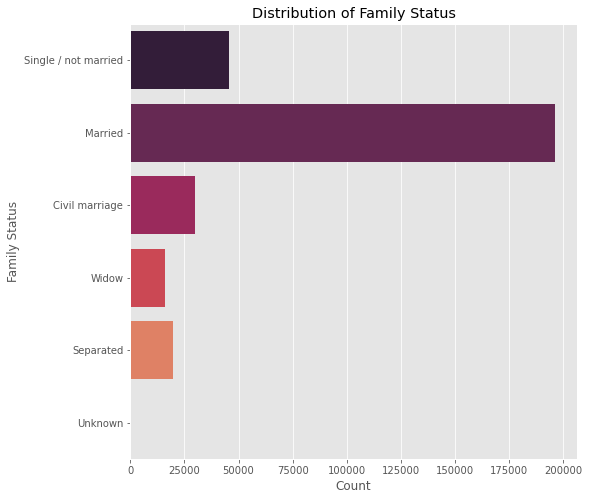

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
with sns.color_palette("rocket"):
    sns.countplot(data=application_train, y='NAME_FAMILY_STATUS')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.title('Distribution of Family Status')
plt.show()

## Plots based on Age

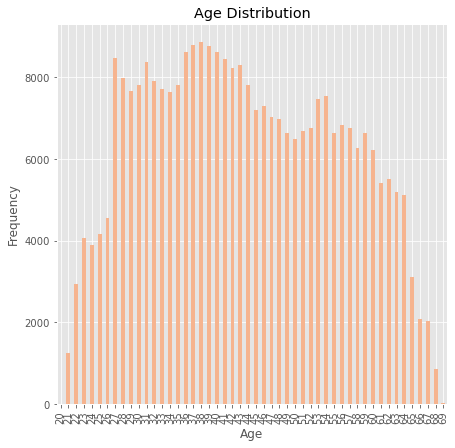

In [17]:
ages = [int(-x/365) for x in application_train.DAYS_BIRTH]

age_counts = pd.Series(ages).value_counts().sort_index()
labels = [f'{age}-{age+9}' for age in range(0, 100, 10)]

plt.figure(figsize=(7, 7))
with sns.color_palette("rocket_r"):
    age_counts.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Plot based on Count of Children

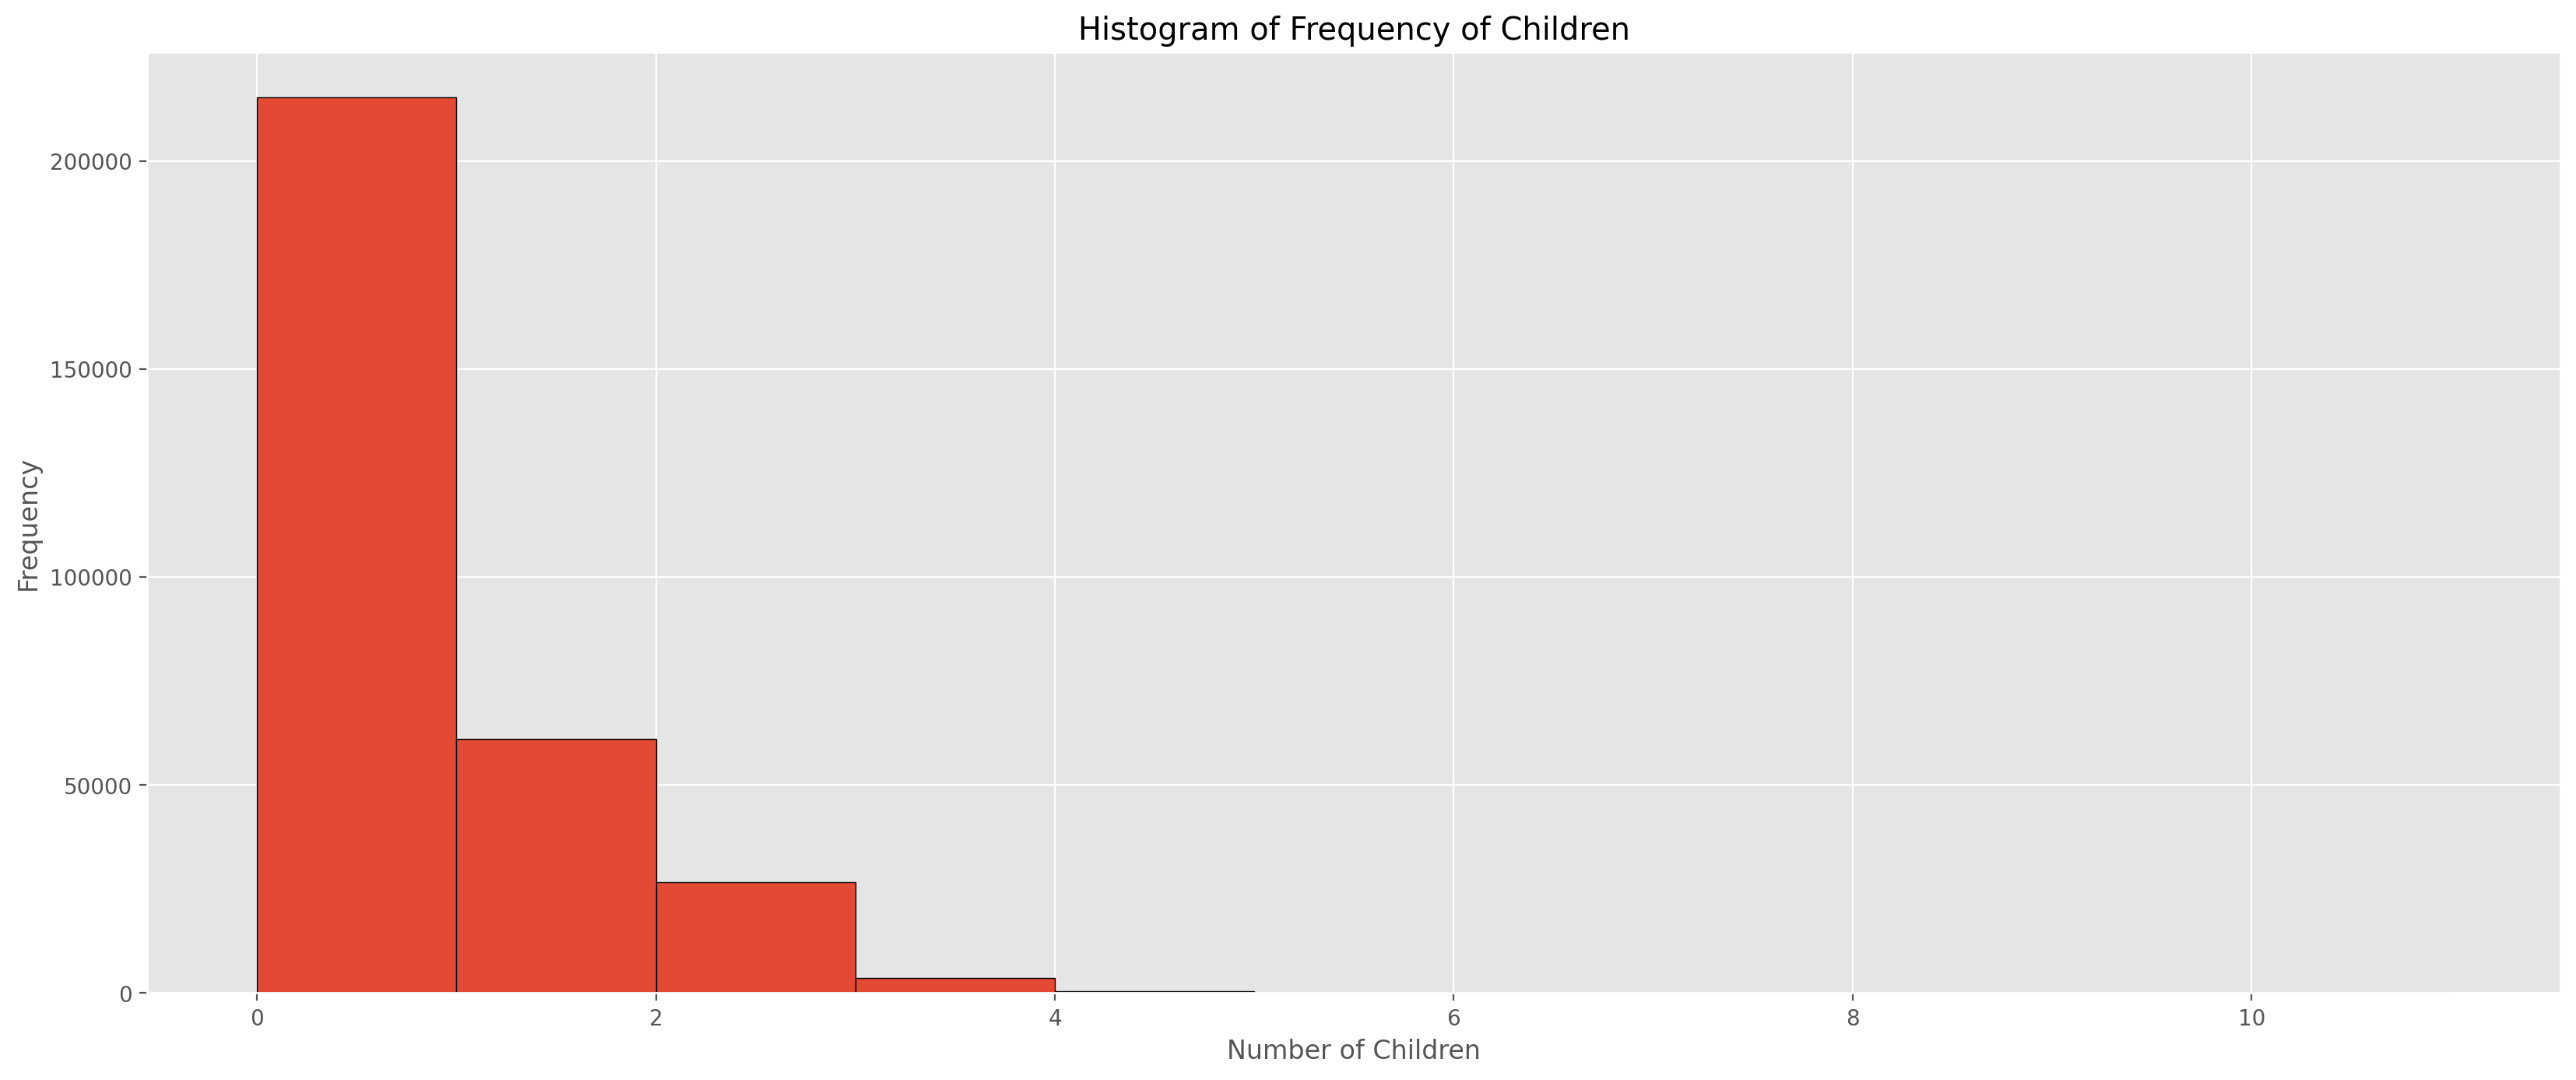

In [18]:
plt.figure(figsize=(20, 8), dpi=200)
plt.hist(application_train['CNT_CHILDREN'], bins=range(12), edgecolor='black')
plt.title("Histogram of Frequency of Children")
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

## Unique Values in Columns

In [19]:
unique_counts = application_train.nunique()

for col_name, unique_count in unique_counts.iteritems():
    print(f"{col_name}: {unique_count}")

SK_ID_CURR: 307511
TARGET: 2
NAME_CONTRACT_TYPE: 2
CODE_GENDER: 3
FLAG_OWN_CAR: 2
FLAG_OWN_REALTY: 2
CNT_CHILDREN: 15
AMT_INCOME_TOTAL: 2548
AMT_CREDIT: 5603
AMT_ANNUITY: 13672
AMT_GOODS_PRICE: 1002
NAME_TYPE_SUITE: 7
NAME_INCOME_TYPE: 8
NAME_EDUCATION_TYPE: 5
NAME_FAMILY_STATUS: 6
NAME_HOUSING_TYPE: 6
REGION_POPULATION_RELATIVE: 81
DAYS_BIRTH: 17460
DAYS_EMPLOYED: 12574
DAYS_REGISTRATION: 15688
DAYS_ID_PUBLISH: 6168
OWN_CAR_AGE: 62
FLAG_MOBIL: 2
FLAG_EMP_PHONE: 2
FLAG_WORK_PHONE: 2
FLAG_CONT_MOBILE: 2
FLAG_PHONE: 2
FLAG_EMAIL: 2
OCCUPATION_TYPE: 18
CNT_FAM_MEMBERS: 17
REGION_RATING_CLIENT: 3
REGION_RATING_CLIENT_W_CITY: 3
WEEKDAY_APPR_PROCESS_START: 7
HOUR_APPR_PROCESS_START: 24
REG_REGION_NOT_LIVE_REGION: 2
REG_REGION_NOT_WORK_REGION: 2
LIVE_REGION_NOT_WORK_REGION: 2
REG_CITY_NOT_LIVE_CITY: 2
REG_CITY_NOT_WORK_CITY: 2
LIVE_CITY_NOT_WORK_CITY: 2
ORGANIZATION_TYPE: 58
EXT_SOURCE_1: 114584
EXT_SOURCE_2: 119831
EXT_SOURCE_3: 814
APARTMENTS_AVG: 2339
BASEMENTAREA_AVG: 3780
YEARS_BEGINEXPL

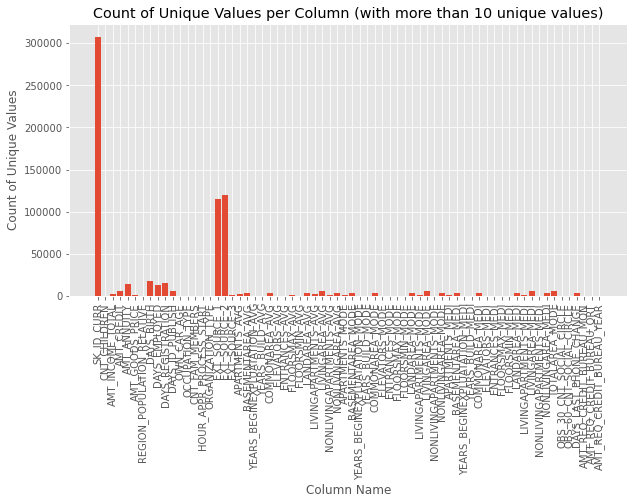

In [20]:
plt.figure(figsize=(10, 5))
filtered_counts = unique_counts[unique_counts > 10]
plt.bar(filtered_counts.index, filtered_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Count of Unique Values')
plt.title('Count of Unique Values per Column (with more than 10 unique values)')
plt.show()

## Bureau Balance Dataset

 This the Data Description Section of the BB Dataset

In [21]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [22]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


## Credit Card Balance
 This the Data Description Section of the CC Dataset

In [23]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [24]:
credit_card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


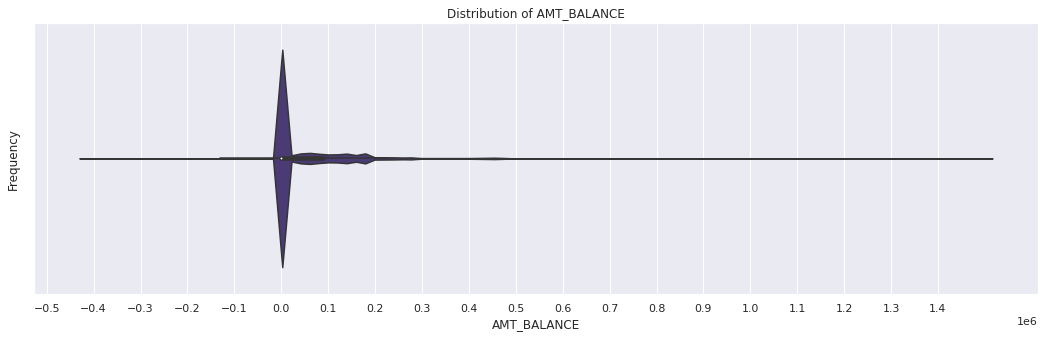

In [25]:
sns.set(rc={'figure.figsize':(18,5)})
with sns.color_palette("viridis"):
    ax = sns.violinplot(x= credit_card_balance['AMT_BALANCE'])
ax.set_xticks([x/10*1e6 for x in range(-5,15,1)])
ax.set_xlabel('AMT_BALANCE')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of AMT_BALANCE')
plt.show()

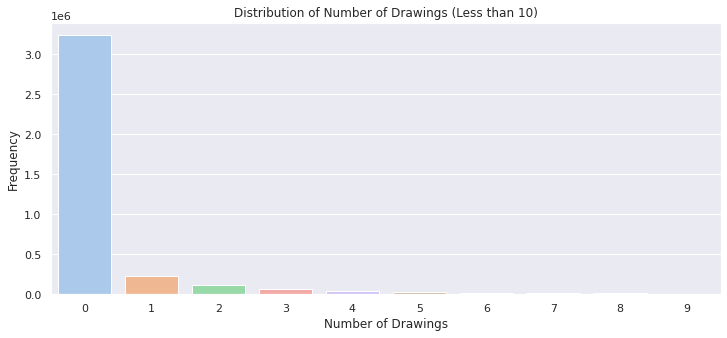

In [26]:
sns.set(rc={'figure.figsize':(12,5)})
with sns.color_palette("pastel"):
    ax = sns.countplot(data= credit_card_balance[credit_card_balance.CNT_DRAWINGS_CURRENT < 10], x="CNT_DRAWINGS_CURRENT")
    ax.set_xticks(range(0,10,1))
    ax.set_xlabel("Number of Drawings")
    ax.set_ylabel("Frequency")
    ax.set_title("Distribution of Number of Drawings (Less than 10)")
    plt.show()

## Installment Payments Dataset

In [27]:
installments_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [28]:
installments_payments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


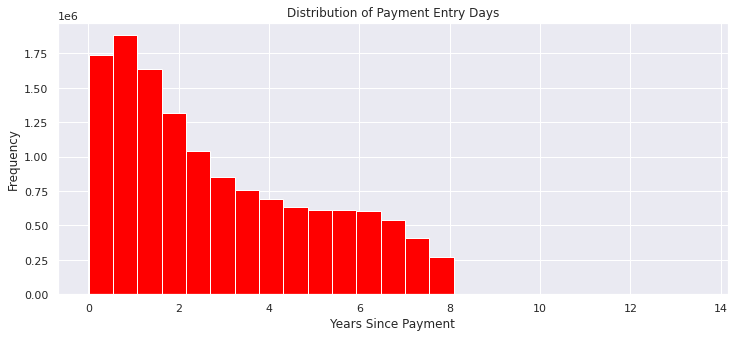

In [29]:
plt.hist( installments_payments["DAYS_ENTRY_PAYMENT"] / -365 , bins=25, color = "red")
plt.xlabel("Years Since Payment")
plt.ylabel("Frequency")
plt.title("Distribution of Payment Entry Days")
plt.show()

## POS Cash Balance

In [30]:
POS_CASH_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [31]:
POS_CASH_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


## Previous Applications

In [32]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [33]:
previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Missing data

In [34]:
missing_data = pd.DataFrame({'column_name': application_train.columns, 
                             'count_missing': application_train.isnull().sum(), 
                             'pct_missing': application_train.isnull().sum() / len(application_train) * 100})
missing_data

,column_name,count_missing,pct_missing
SK_ID_CURR,SK_ID_CURR,0,0.000000
TARGET,TARGET,0,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,CODE_GENDER,0,0.000000
FLAG_OWN_CAR,FLAG_OWN_CAR,0,0.000000
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631


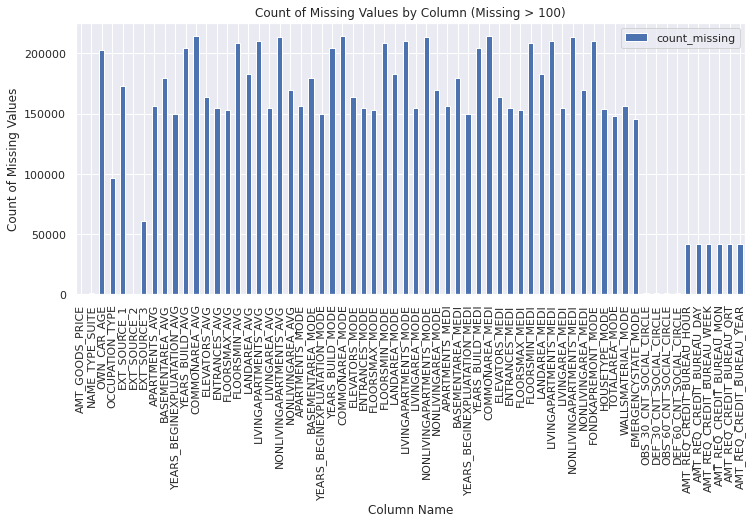

In [35]:
missing_data_filtered = missing_data.query('count_missing > 100')
missing_data_filtered.plot(x='column_name', y='count_missing', kind='bar', figsize=(12,5))
plt.xlabel('Column Name')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values by Column (Missing > 100)')
plt.show()


In [36]:
missing_data_test = pd.DataFrame({'column_name': application_test.columns, 
                             'count_missing': application_test.isnull().sum(), 
                             'pct_missing': application_test.isnull().sum() / len(application_test) * 100})
missing_data_test

,column_name,count_missing,pct_missing
SK_ID_CURR,SK_ID_CURR,0,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,CODE_GENDER,0,0.000000
FLAG_OWN_CAR,FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,FLAG_OWN_REALTY,0,0.000000
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732


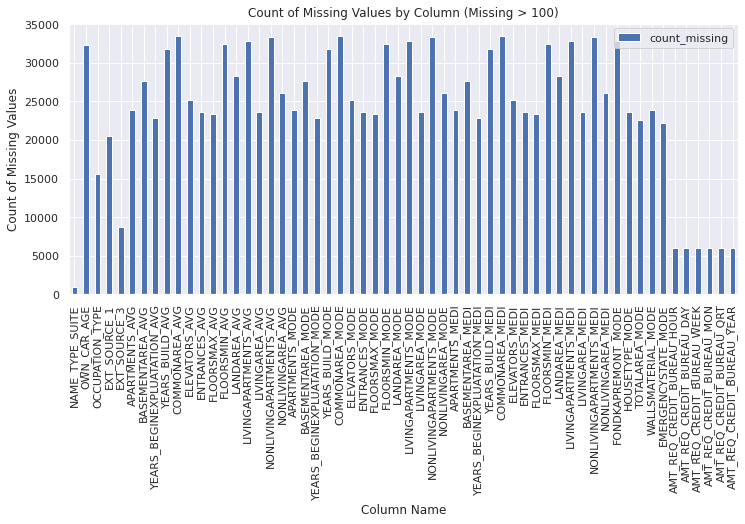

In [37]:
missing_data_test_filtered = missing_data_test.query('count_missing > 100')
missing_data_test_filtered.plot(x='column_name', y='count_missing', kind='bar', figsize=(12,5))
plt.xlabel('Column Name')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values by Column (Missing > 100)')
plt.show()

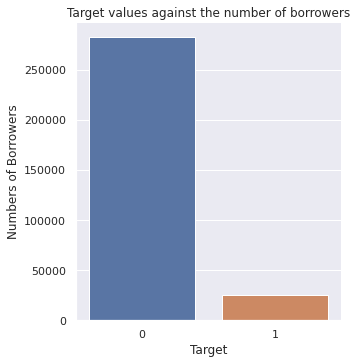

In [38]:
sns.catplot(data = application_train, x='TARGET', kind = 'count')
plt.xlabel('Target');
plt.ylabel('Numbers of Borrowers');
plt.title('Target values against the number of borrowers');
plt.show()

In [39]:
# Count the number of unique values in a column
unique_count = application_train['SK_ID_CURR'].nunique()

# Print the result
print('The number of unique values in the column is:', unique_count)
print(unique_count == application_train.shape[0])

The number of unique values in the column is: 307511
True


In [40]:
application_train.shape

(307511, 122)

In [41]:
application_test.shape

(48744, 121)

In [42]:
df_apps = previous_application
df_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


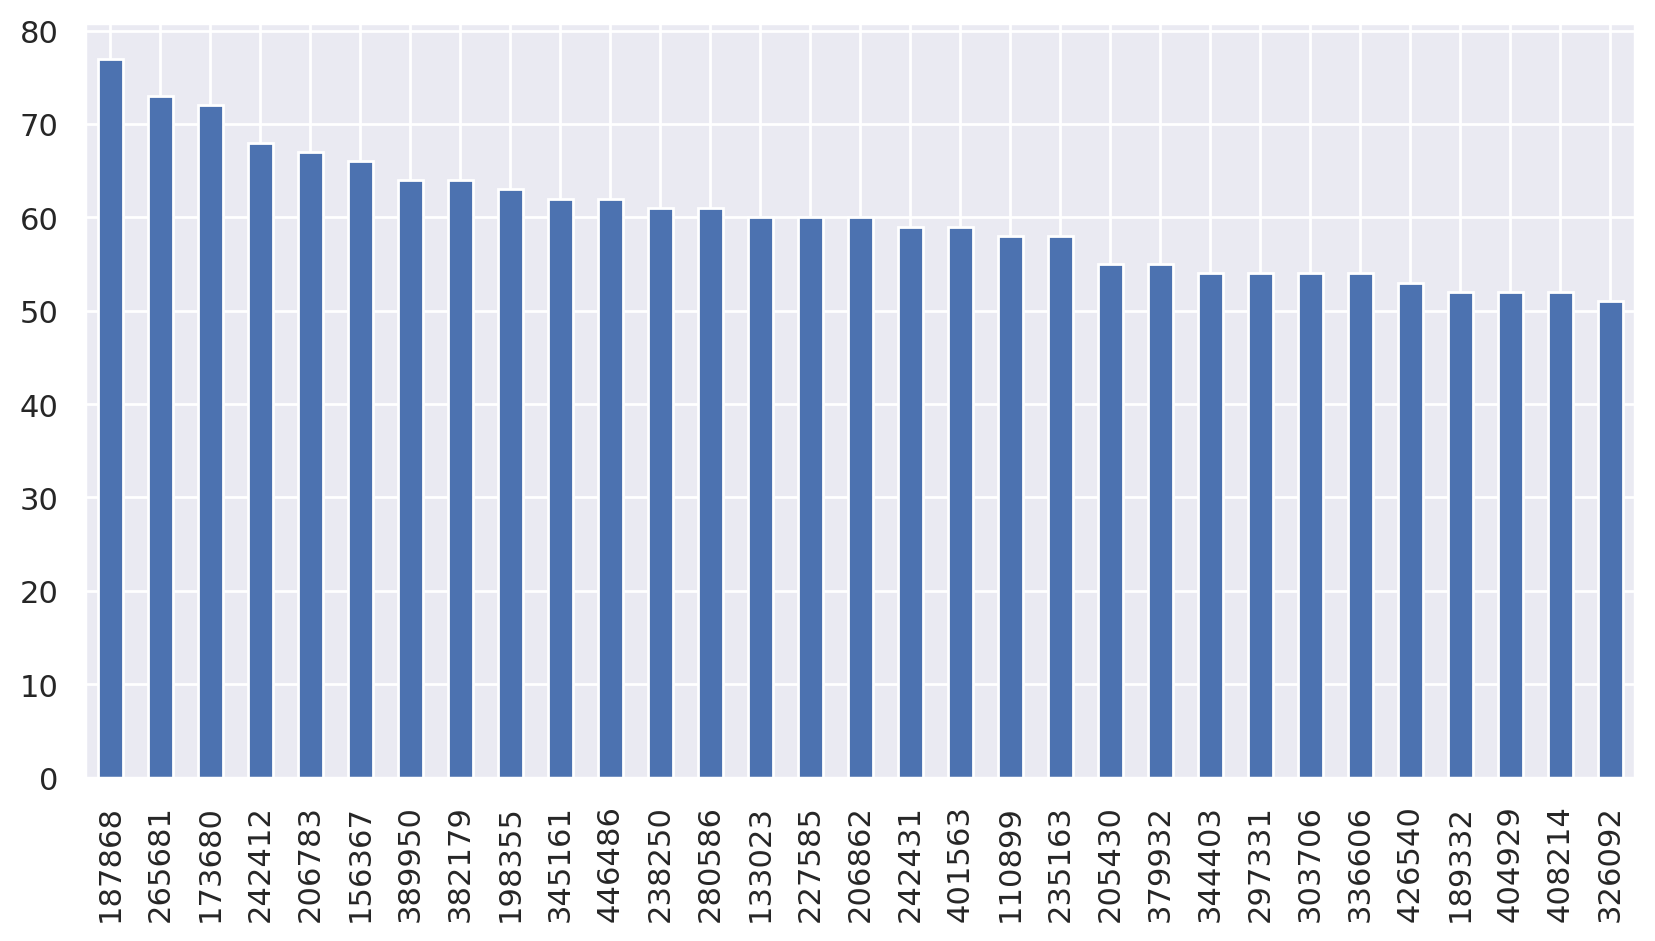

In [43]:
plt.figure(figsize = (10, 5), dpi = 200)
prevAppCounts = df_apps['SK_ID_CURR'].value_counts(dropna=False)
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis

In [44]:
corr = application_train.corr()['TARGET'].sort_values()
print('Top Positive Correlations:\n', corr.tail(10))
print('\nTop Negative Correlations:\n', corr.head(10))

Top Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [45]:
corr_train = application_train.corr()['TARGET'].sort_values()
corr_train = corr_train.reset_index().rename(columns={'index':'Attributes','TARGET':'Correlation'})
corr_train

,Attributes,Correlation
0,EXT_SOURCE_3,-0.178919
1,EXT_SOURCE_2,-0.160472
2,EXT_SOURCE_1,-0.155317
3,DAYS_EMPLOYED,-0.044932
4,FLOORSMAX_AVG,-0.044003
...,...,...
101,DAYS_LAST_PHONE_CHANGE,0.055218
102,REGION_RATING_CLIENT,0.058899
103,REGION_RATING_CLIENT_W_CITY,0.060893
104,DAYS_BIRTH,0.078239


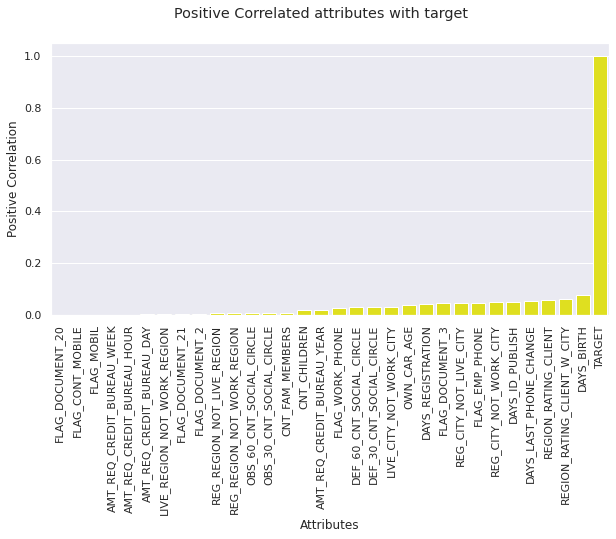

In [46]:
plt.figure(figsize = (10, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_train[corr_train.Correlation>0], palette = ['yellow'])
plt.xlabel('Attributes');
plt.ylabel('Positive Correlation');
plt.suptitle('Positive Correlated attributes with target');
plt.xticks(rotation=90);
plt.show()

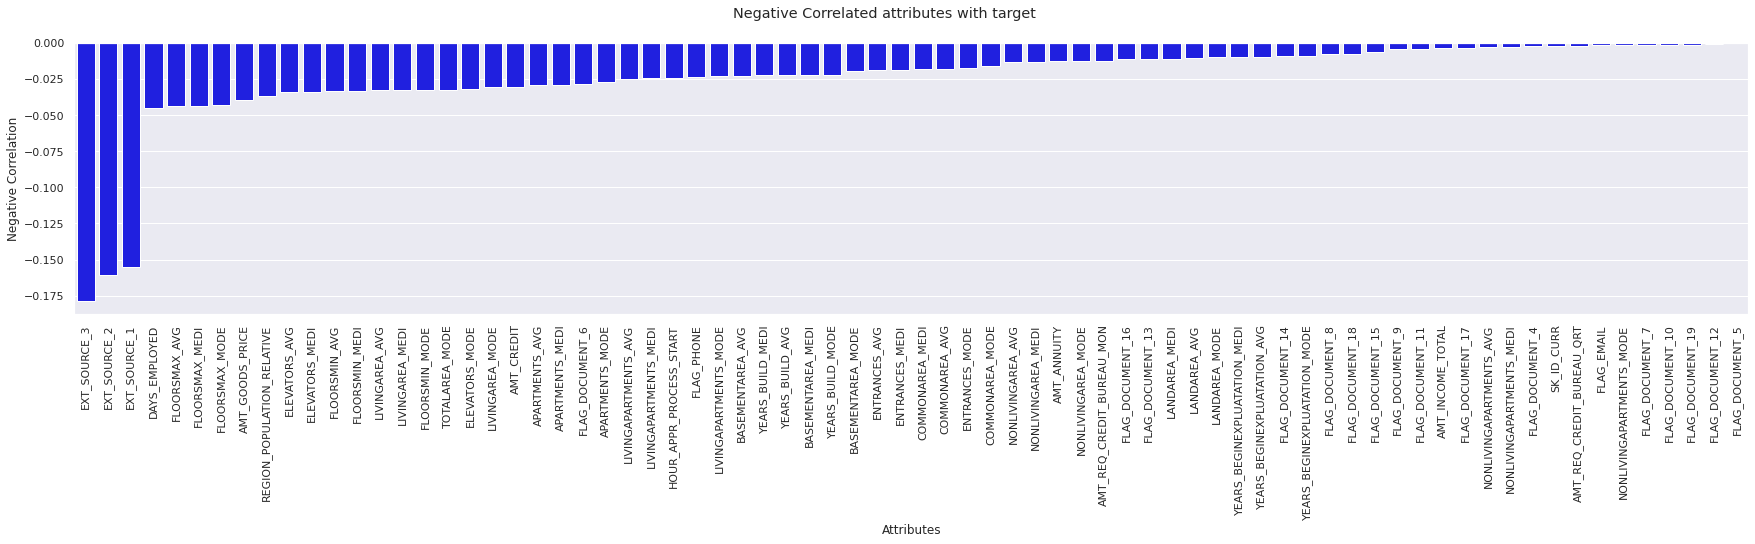

In [47]:
plt.figure(figsize = (30, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_train[corr_train.Correlation<=0], palette = ['blue'])
plt.xlabel('Attributes');
plt.ylabel('Negative Correlation');
plt.suptitle('Negative Correlated attributes with target');
plt.xticks(rotation=90);
plt.show()

In [48]:
application_train['DAYS_BIRTH']=abs(application_train['DAYS_BIRTH'])
corr1= application_train.corr()['TARGET']
corr1['DAYS_BIRTH']

-0.07823930830982459

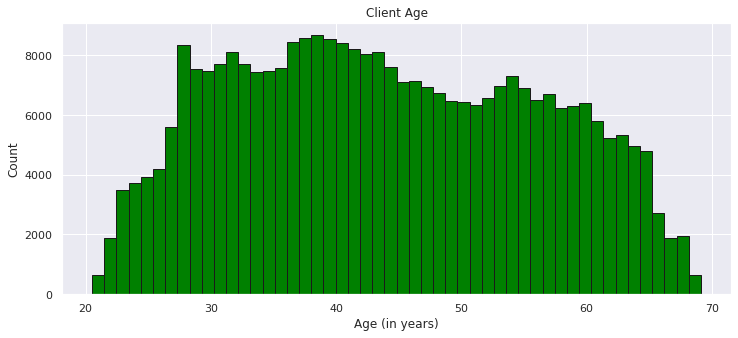

In [49]:
plt.hist(application_train['DAYS_BIRTH']/365, edgecolor='k',bins=50,color ="green")
plt.title('Client Age'); 
plt.xlabel('Age (in years)'); 
plt.ylabel('Count');

#### Average failure statistics to repay loans by age 

In [50]:
age=application_train[['TARGET','DAYS_BIRTH']]
age['YEARS']=age['DAYS_BIRTH']/365

In [51]:
age['BIN']=pd.cut(age['YEARS'],bins=np.linspace(20,70,num=10))
age.head(20)

,TARGET,DAYS_BIRTH,YEARS,BIN
0,1,9461,25.920548,"(25.556, 31.111]"
1,0,16765,45.931507,"(42.222, 47.778]"
2,0,19046,52.180822,"(47.778, 53.333]"
3,0,19005,52.068493,"(47.778, 53.333]"
4,0,19932,54.608219,"(53.333, 58.889]"
5,0,16941,46.413699,"(42.222, 47.778]"
6,0,13778,37.747945,"(36.667, 42.222]"
7,0,18850,51.643836,"(47.778, 53.333]"
8,0,20099,55.065753,"(53.333, 58.889]"
9,0,14469,39.641096,"(36.667, 42.222]"


In [52]:
# Grouping the data by the bin and calculate averages
age_grouped=age.groupby('BIN').mean()
age_grouped

,TARGET,DAYS_BIRTH,YEARS
BIN,,,
"(20.0, 25.556]",0.120556,8643.263107,23.680173
"(25.556, 31.111]",0.111301,10429.717730,28.574569
"(31.111, 36.667]",0.099283,12365.678346,33.878571
"(36.667, 42.222]",0.084212,14386.157592,39.414130
"(42.222, 47.778]",0.076045,16391.211831,44.907430
"(47.778, 53.333]",0.070607,18455.488908,50.562983
"(53.333, 58.889]",0.057587,20448.357206,56.022896
"(58.889, 64.444]",0.053454,22453.398290,61.516160
"(64.444, 70.0]",0.042071,24115.720374,66.070467


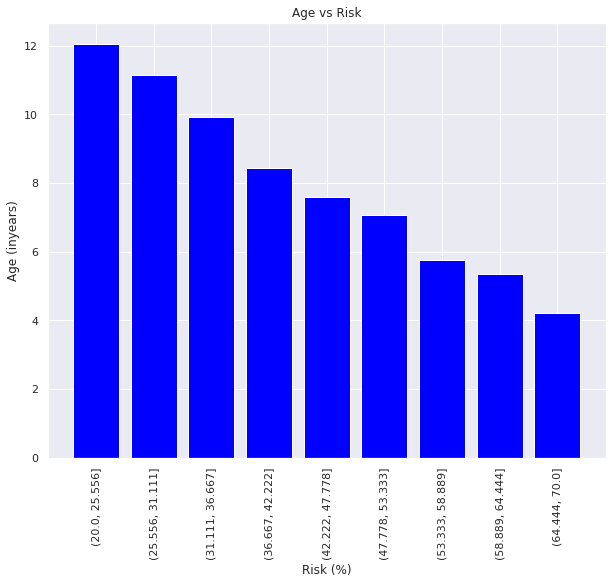

In [53]:
plt.figure(figsize = (10,8))
plt.bar(age_grouped.index.astype(str),100 * age_grouped['TARGET'],color ="blue")
plt.xticks(rotation = 90);
plt.xlabel('Risk (%)'); 
plt.ylabel('Age (inyears)');
plt.title('Age vs Risk');

### Missing values in prevApps

In [54]:
df_apps.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

### Feature engineering for prevApp table

The groupby output will have an index or multi-index on rows corresponding to your chosen grouping variables. To avoid setting this index, pass “as_index=False” to the groupby operation.

```python
import pandas as pd
import dateutil

# Load data from csv file
data = pd.DataFrame.from_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

data.groupby('month', as_index=False).agg({"duration": "sum"})
```
Pandas `reset_index()` to convert Multi-Index to Columns
We can simplify the multi-index dataframe using reset_index() function in Pandas. By default, Pandas reset_index() converts the indices to columns.

### Fixing Column names after Pandas agg() function to summarize grouped data
Since we have both the variable name and the operation performed in two rows in the Multi-Index dataframe, we can use that and name our new columns correctly.

For more details unstacking groupby results and examples please see [here](https://cmdlinetips.com/2020/05/fun-with-pandas-groupby-aggregate-multi-index-and-unstack/)




For more details and examples please see [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [3]:
# Create aggregate features (via pipeline)
class FeaturesAggregation(BaseEstimator, TransformerMixin):
    def __init__(self, features=None, agg_needed=["mean"]): # no *args or **kargs
        self.features = features
        self.agg_needed = agg_needed
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = self.agg_needed[:]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        df_result = pd.DataFrame()
        for x1, x2 in result.columns:
            new_col = x1 + "_" + x2
            df_result[new_col] = result[x1][x2]
        df_result = df_result.reset_index(level=["SK_ID_CURR"])
        return df_result

In [4]:
previous_feature = ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "approved_credit_ratio", 
                    "AMT_ANNUITY_credit_ratio", "Interest_ratio", "LTV_ratio", "SK_ID_PREV", "approved"]

agg_needed = ["min", "max", "mean", "count", "sum"]

def previous_feature_aggregation(df, feature, agg_needed):
    df['approved_credit_ratio'] = (df['AMT_APPLICATION']/df['AMT_CREDIT']).replace(np.inf, 0)
    # installment over credit approved ratio
    df['AMT_ANNUITY_credit_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    # total interest payment over credit ratio
    df['Interest_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    #  loan cover ratio
    df['LTV_ratio'] = (df['AMT_CREDIT']/df['AMT_GOODS_PRICE']).replace(np.inf, 0)
    df['approved'] = np.where(df.AMT_CREDIT >0 ,1, 0)
    
    test_pipeline = make_pipeline(FeaturesAggregation(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
previous_application_agg = previous_feature_aggregation(previous_application, previous_feature, agg_needed)

In [5]:
previous_application_agg.isna().sum()

SK_ID_CURR                           0
AMT_APPLICATION_min                  0
AMT_APPLICATION_max                  0
AMT_APPLICATION_mean                 0
AMT_APPLICATION_count                0
AMT_APPLICATION_sum                  0
AMT_CREDIT_min                       0
AMT_CREDIT_max                       0
AMT_CREDIT_mean                      0
AMT_CREDIT_count                     0
AMT_CREDIT_sum                       0
AMT_ANNUITY_min                    480
AMT_ANNUITY_max                    480
AMT_ANNUITY_mean                   480
AMT_ANNUITY_count                    0
AMT_ANNUITY_sum                      0
approved_credit_ratio_min          252
approved_credit_ratio_max          252
approved_credit_ratio_mean         252
approved_credit_ratio_count          0
approved_credit_ratio_sum            0
AMT_ANNUITY_credit_ratio_min       481
AMT_ANNUITY_credit_ratio_max       481
AMT_ANNUITY_credit_ratio_mean      481
AMT_ANNUITY_credit_ratio_count       0
AMT_ANNUITY_credit_ratio_

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Nextstep is secondary tables processing and merging with the primary table

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Missing values handling in Installment payments

In [6]:
installments_payments.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [7]:
payments_features = ["DAYS_INSTALMENT_DIFF", "AMT_PATMENT_PCT"]

agg_needed = ["mean"]

def payments_feature_aggregation(df, feature, agg_needed):
    df['DAYS_INSTALMENT_DIFF'] = df['DAYS_INSTALMENT'] - df['DAYS_ENTRY_PAYMENT']
    df['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_PAYMENT,df.AMT_INSTALMENT)]
    
    test_pipeline = make_pipeline(FeaturesAggregation(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
installments_payments_agg = payments_feature_aggregation(installments_payments, payments_features, agg_needed)

In [8]:
installments_payments_agg.isna().sum()

SK_ID_CURR                    0
DAYS_INSTALMENT_DIFF_mean     9
AMT_PATMENT_PCT_mean         12
dtype: int64

### Missing values handling in Credit Card Balance

In [9]:
credit_card_balance.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [10]:
credit_features = ["AMT_BALANCE", "AMT_DRAWINGS_PCT", "AMT_DRAWINGS_ATM_PCT", "AMT_DRAWINGS_OTHER_PCT", "AMT_DRAWINGS_POS_PCT", 
                   "AMT_PRINCIPAL_RECEIVABLE_PCT", "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT",
                   "CNT_DRAWINGS_POS_CURRENT", "SK_DPD", "SK_DPD_DEF"]

agg_needed = ["mean"]

def credit_feature_aggregation(df, feature, agg_needed):
    df['AMT_DRAWINGS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_DRAWINGS_CURRENT,df.AMT_CREDIT_LIMIT_ACTUAL)]
    df['AMT_DRAWINGS_ATM_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_DRAWINGS_ATM_CURRENT,df.AMT_CREDIT_LIMIT_ACTUAL)]
    df['AMT_DRAWINGS_OTHER_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_DRAWINGS_OTHER_CURRENT,df.AMT_CREDIT_LIMIT_ACTUAL)]
    df['AMT_DRAWINGS_POS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_DRAWINGS_POS_CURRENT,df.AMT_CREDIT_LIMIT_ACTUAL)]
    df['AMT_PRINCIPAL_RECEIVABLE_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_RECEIVABLE_PRINCIPAL,df.AMT_RECIVABLE)]
    
    test_pipeline = make_pipeline(FeaturesAggregation(feature, agg_needed))
    return(test_pipeline.fit_transform(df))


credit_card_balance_agg = credit_feature_aggregation(credit_card_balance, credit_features, agg_needed)
  

In [11]:
credit_card_balance_agg.isna().sum()

SK_ID_CURR                               0
AMT_BALANCE_mean                         0
AMT_DRAWINGS_PCT_mean                 1113
AMT_DRAWINGS_ATM_PCT_mean            32278
AMT_DRAWINGS_OTHER_PCT_mean          32278
AMT_DRAWINGS_POS_PCT_mean            32278
AMT_PRINCIPAL_RECEIVABLE_PCT_mean    33033
CNT_DRAWINGS_ATM_CURRENT_mean        31364
CNT_DRAWINGS_CURRENT_mean                0
CNT_DRAWINGS_OTHER_CURRENT_mean      31364
CNT_DRAWINGS_POS_CURRENT_mean        31364
SK_DPD_mean                              0
SK_DPD_DEF_mean                          0
dtype: int64

In [12]:
application_train.keys()
installments_payments_agg.keys()
previous_application_agg.keys()
credit_card_balance_agg.keys()

Index(['SK_ID_CURR', 'AMT_BALANCE_mean', 'AMT_DRAWINGS_PCT_mean',
       'AMT_DRAWINGS_ATM_PCT_mean', 'AMT_DRAWINGS_OTHER_PCT_mean',
       'AMT_DRAWINGS_POS_PCT_mean', 'AMT_PRINCIPAL_RECEIVABLE_PCT_mean',
       'CNT_DRAWINGS_ATM_CURRENT_mean', 'CNT_DRAWINGS_CURRENT_mean',
       'CNT_DRAWINGS_OTHER_CURRENT_mean', 'CNT_DRAWINGS_POS_CURRENT_mean',
       'SK_DPD_mean', 'SK_DPD_DEF_mean'],
      dtype='object')

## Merge primary table with secondary tables using features based on meta data and aggregage stats performed above

In [46]:
train_dataset= application_train  #primary dataset
    
merged_data = True

if merged_data:
    # 1. Join/Merge in prevApps Data
    train_dataset = train_dataset.merge(previous_application_agg, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    train_dataset = train_dataset.merge(installments_payments_agg, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    train_dataset = train_dataset.merge(credit_card_balance_agg, how='left', on="SK_ID_CURR")

# Creating a test data set with similar fields

In [47]:
X_kaggle_test= application_test


if merged_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(previous_application_agg, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    X_kaggle_test = X_kaggle_test.merge(installments_payments_agg, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    X_kaggle_test = X_kaggle_test.merge(credit_card_balance_agg, how='left', on="SK_ID_CURR")

## HCDR preprocessing

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

#### ACCURACY:

In [67]:
import latexify
@latexify.function
def Accuracy():
    return (TN + TP) / (TN + FP + TP + FN)
Accuracy

#### F1 SCORE:


In [68]:
@latexify.function
def F1Score():
    return (2) * (Precision * Recall) / (Precision + Recall)
F1Score

#### RECALL:


In [69]:
@latexify.function
def Recall():
    return (TP) / (TP + FN)
Recall

#### LOG LOSS:


In [70]:
@latexify.function(use_math_symbols=True)
def logLoss():
    return (-1 / N) * Sigma(_i**N) (y_i * log(p(y_i)) + (1 - y_i) * log(1 - p(y_i)))
logLoss

In [71]:
#Block Diagram

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [73]:
def pct(x):
    return round(100*x,3)

# Results as Experiment Logs

In [74]:
try:
    experimentLog
except NameError:
    experimentLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC", 
                                   "Train F1 Score",
                                   "Valid F1 Score",
                                   "Test F1 Score"
                                  ])

In [75]:
def get_results(expLog, exp_name, model, X_train, y_train, X_valid, y_valid, X_test, y_test):
    expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_score(y_train, model.predict(X_train)), 
                f1_score(y_valid, model.predict(X_valid)), 
                f1_score(y_test, model.predict(X_test))],
    4))
    return expLog

# Creating the Pipeline for the features transformation

In [48]:
num_features = []
cat_features = []
for x in train_dataset:
    if(train_dataset[x].dtype == np.float64 or train_dataset[x].dtype == np.int64):
        num_features.append(x)
    else:
        cat_features.append(x)
num_features.remove('TARGET')
num_features.remove('SK_ID_CURR')

# Pipeline
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_features)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_features)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])  

selected_features = num_features + cat_features + ["SK_ID_CURR"]
tot_features = f"{len(selected_features)}:   Num:{len(num_features)},    Cat:{len(cat_features)}"

print('Total Features:', tot_features)

Total Features: 180:   Num:163,    Cat:16


# Splitting the data into Train and Test datasets

In [49]:
y_train = train_dataset['TARGET']
X_train = train_dataset[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.17, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.17, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (211844, 180)
X validation      shape: (52277, 180)
X test            shape: (43390, 180)
X X_kaggle_test   shape: (48744, 180)


In [50]:
(data_prep_pipeline)

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelector(attribute_names=['CNT_CHILDREN',
                                                                                    'AMT_INCOME_TOTAL',
                                                                                    'AMT_CREDIT',
                                                                                    'AMT_ANNUITY',
                                                                                    'AMT_GOODS_PRICE',
                                                                                    'REGION_POPULATION_RELATIVE',
                                                                                    'DAYS_BIRTH',
                                                                                    'DAYS_EMPLOYED',
                                                                          

# Baseline Model evalutaion on the Full scale data

In [79]:
np.random.seed(42)
basepipeline_regressor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
model = basepipeline_regressor.fit(X_train, y_train)

In [80]:
np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.919

## Performing Crossvalidation on the Dataset

In [81]:
cv_Splits = ShuffleSplit(n_splits=5, test_size=0.45, random_state=42)

In [82]:
from sklearn.model_selection import cross_val_score

model = basepipeline_regressor.fit(X_train, y_train)
np.random.seed(42)

logit_scores = cross_val_score(basepipeline_regressor,X_train , y_train,cv=cv_Splits)               
logit_score_train = pct(logit_scores.mean())

logit_score_test  = basepipeline_regressor.score(X_test, y_test)

print("Test Acc: ", logit_score_test)

Test Acc:  0.918022585849274


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer

roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.7595922437473971

F1 Score for Test set:  0.03421124083627478


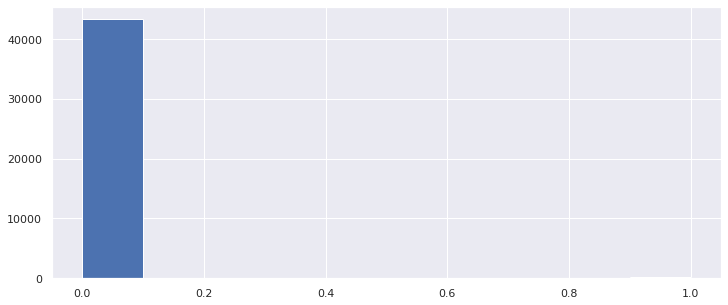

In [84]:
pred = model.predict(X_test)
plt.hist(pred)
f1_train = f1_score(y_train, model.predict(X_train))
f1_valid = f1_score(y_valid, model.predict(X_valid))
f1_test = f1_score(y_test, model.predict(X_test))
print("F1 Score for Test set: ", f1_test)

In [85]:
experiment_Labels = f"Baseline_{len(selected_features)}_features"
experimentLog.loc[len(experimentLog)] = [f"{experiment_Labels}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
                f1_train, f1_valid, f1_test],
    4)) 
experimentLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.918,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342


Inorder to improve the F1 Score, we have used the Adaptive Synthetic Sampling on the data using the library function in Python

# Inorder to improve the F1 Score, we have to use the either the Synthetic Sample generator or the undersampling to make it a balanced dataset, The Synthetic sample generator takes only numerical input and hence the categorical inputs lose the singnificance before feeding them to model, So we are opting for undersampling

In [51]:
train_dataset_sampled=train_dataset[train_dataset['TARGET']==1]
train_dataset_sampled = train_dataset_sampled.append(train_dataset[train_dataset['TARGET']==0].reset_index(drop=True).sample(n = 60000))

In [52]:
train_dataset_sampled['TARGET'].value_counts()

0    60000
1    24825
Name: TARGET, dtype: int64

In [53]:
train_dataset_sampled_2=train_dataset[train_dataset.TARGET==1].copy()
train_dataset_sampled_2['weight']=1
default_cashloans=train_dataset_sampled_2[(train_dataset_sampled_2.TARGET==1) & (train_dataset_sampled_2.NAME_CONTRACT_TYPE=='Cash loans')].shape[0]
default_revolvingloans=train_dataset_sampled_2[(train_dataset_sampled_2.TARGET==1)&(train_dataset_sampled_2.NAME_CONTRACT_TYPE=='Revolving loans')].shape[0]


In [54]:
# Undersampling Cash loans 
df_sample=train_dataset[(train_dataset.NAME_CONTRACT_TYPE =='Cash loans')&(train_dataset.TARGET==0)].sample(n=int(1.45*default_cashloans),random_state=1)
df_sample['weight']=train_dataset[(train_dataset.NAME_CONTRACT_TYPE=='Cash loans')&(train_dataset.TARGET==0)].shape[0]/int(1.45*default_cashloans)
train_dataset_sampled_2=pd.concat([train_dataset_sampled_2, df_sample])


In [55]:
# Undersampling Revovling Loans
df_sample=train_dataset[(train_dataset.NAME_CONTRACT_TYPE=='Revolving loans')&(train_dataset.TARGET==0)].sample(n=int(1.45*default_revolvingloans),random_state=1)
df_sample['weight']=train_dataset[(train_dataset.NAME_CONTRACT_TYPE=='Revolving loans')&(train_dataset.TARGET==0)].shape[0]/int(1.45*default_revolvingloans)
train_dataset_sampled_2=pd.concat([train_dataset_sampled_2, df_sample])


In [56]:
train_dataset_sampled_2['TARGET'].value_counts()

0    35995
1    24825
Name: TARGET, dtype: int64

In [57]:
y_train_sampled = train_dataset_sampled_2['TARGET']
X_train_sampled = train_dataset_sampled_2[selected_features]
X_train_sampled, X_valid_sampled, y_train_sampled, y_valid_sampled = train_test_split(X_train_sampled, y_train_sampled, test_size=0.15, random_state=42)
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_train_sampled, y_train_sampled, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]

print(f"X train sampled           shape: {X_train_sampled.shape}")
print(f"X validation sampled      shape: {X_valid_sampled.shape}")
print(f"X test sampled          shape: {X_test_sampled.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train sampled           shape: (43942, 180)
X validation sampled      shape: (9123, 180)
X test sampled          shape: (7755, 180)
X X_kaggle_test   shape: (48744, 180)


In [94]:
model = basepipeline_regressor.fit(X_train_sampled, y_train_sampled)

# Results of the experiment

In [95]:
exp_name = f"Baseline_resampled2_{len(selected_features)}_features"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037


# Support Vector Machine

The SVM has a longer runtime on the Entire feature dataset 


In [96]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
np.random.seed(42)

svm_sampled_pipeline = Pipeline([
    ("preparation", data_prep_pipeline),
    ("svm", LinearSVC(random_state=42,dual=False))
])


LSVC_model = CalibratedClassifierCV(svm_sampled_pipeline, cv=5)


In [97]:
LSVC_model.fit(X_train_sampled, y_train_sampled)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('preparation',
                                                       FeatureUnion(transformer_list=[('num_pipeline',
                                                                                       Pipeline(steps=[('selector',
                                                                                                        DataFrameSelector(attribute_names=['CNT_CHILDREN',
                                                                                                                                           'AMT_INCOME_TOTAL',
                                                                                                                                           'AMT_CREDIT',
                                                                                                                                           'AMT_ANNUITY',
                                                                                          

In [98]:
score_test  = LSVC_model.score(X_test_sampled, y_test_sampled)
score_test

0.6983881366860091

In [99]:
exp_name = f"SVM_resampled2_{len(selected_features)}_features"
experimentLog = get_results(experimentLog, exp_name, LSVC_model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873


# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
random_forest_pipeline= Pipeline([
    ("preparation", data_prep_pipeline),
    ("random forest", RandomForestClassifier(random_state=42, bootstrap=True, max_depth=21, 
                      max_features=6, min_samples_leaf=10, min_samples_split=13, n_estimators=500))
])


model = random_forest_pipeline.fit(X_train_sampled, y_train_sampled)

exp_name = f"Random_Forest_sampled_{len(selected_features)}_features"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873
3,Random_Forest_sampled_180_features,0.8137,0.6723,0.6722,0.9289,0.7288,0.7362,0.7262,0.4704,0.4858


# XGBoost

In [101]:
# Attaching XGBoost model to the above pipeline
xgboost_pipeline = Pipeline([
    ("preparation", data_prep_pipeline),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=5, eta=0.001, 
                learning_rate=0.01, colsample_bytree=0.7, n_estimators=1000))
])

model = xgboost_pipeline.fit(X_train_sampled, y_train_sampled)

# Results
exp_name = f"XGBoost_Sampled_{len(selected_features)}_features"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

[00:41:44] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873
3,Random_Forest_sampled_180_features,0.8137,0.6723,0.6722,0.9289,0.7288,0.7362,0.7262,0.4704,0.4858
4,XGBoost_Sampled_180_features,0.7517,0.7083,0.7087,0.8233,0.7622,0.7642,0.6683,0.6062,0.6169



### Hyper-parameter tuning for Random Forest model

In [102]:
features_dict = dict()
def GridSearch_Validation(X_train, y_train, X_test, y_test):
    classifiers = [
        ('XGBoost', XGBClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier(random_state=42))
        #('LogisticRegression', LogisticRegression())
    ]
    
    # grid search parameters for the classifier
    
    param_grid = {
         'XGBoost': {
        'max_depth': [3, 7],
        'learning_rate': [0.1, 0.01],
        'n_estimators': [100, 500],
        'subsample': [0.4, 1.0],
        'colsample_bytree': [0.4, 0.7]
    },
        'RandomForest': {
        'n_estimators': [100, 500],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
        }
    }
    
    
    for (name, classifier) in classifiers:
        
        print('****** STARTING', name,' Model *****')
        parameters = param_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline = Pipeline([
            ("preparation", FeatureUnion(transformer_list=[("num_pipeline", num_pipeline)])),
            ("predictor", classifier)
        ])
        
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        
        grid_search = GridSearchCV(full_pipeline, params, scoring='accuracy', cv=2, 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

        grid_search.best_estimator_.fit(X_train, y_train)

        
        # Training accuracy
        cvSplits = ShuffleSplit(n_splits=3, test_size=0.7, random_state=42)
        best_train_scores = cross_val_score(full_pipeline,X_train , y_train, cv=cvSplits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))

        # Importance of features
        features = num_features[:]
        print('\nTotal number of features:', len(features))
        importances = grid_search.best_estimator_.named_steps["predictor"].feature_importances_
        
        # selecting features based on importance values
        new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
        new_importances = [x for idx, x in enumerate(importances) if x>0.01]
        new_features = [features[i] for i in new_indices]
        
        print('Total number of selected features:', len(new_features))
        
        # Best parameters found using grid search
        print(f"Best Parameters for {name}:")
        best_parameters = grid_search.best_estimator_.get_params()
        best_params = []
        for param_name in sorted(params.keys()):
            best_params.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",name," *****")
        
        # Results
        #experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
        features_dict['features'] = features
        features_dict['importances'] = importances

In [103]:
GridSearch_Validation(X_train_sampled, y_train_sampled,
                      X_test_sampled, y_test_sampled)


****** STARTING XGBoost  Model *****
Parameters:
	colsample_bytree: [0.4, 0.7]
	learning_rate: [0.1, 0.01]
	max_depth: [3, 7]
	n_estimators: [100, 500]
	subsample: [0.4, 1.0]
Fitting 2 folds for each of 32 candidates, totalling 64 fits
[00:53:42] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:53:56] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:54:09] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore th

# Feature Selection


## Performance with features with importance > 0 for both XGBoost and Random Forest Models

In [117]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0]
new_importances = [x for idx, x in enumerate(importances) if x>0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

   
num_pipeline1 = Pipeline([
            ('selector', DataFrameSelector(new_features)),
            ('imputer', SimpleImputer(strategy='mean')),
            ('std_scaler', StandardScaler()),
        ])

data_prep_pipeline1 = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline1),
            ("cat_pipeline", cat_pipeline),
        ])
selected_features = new_features + cat_features + ["SK_ID_CURR"]


rf_full_pipeline_1 = Pipeline([
    ("preparation", data_prep_pipeline1),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=3, eta=0.1, 
                learning_rate=0.1, colsample_bytree=0.7, n_estimators=500))])


# Training the model
model = rf_full_pipeline_1.fit( X_train_sampled, y_train_sampled)

# Results
exp_name = f"XGboost_Best{len(selected_features)}_features > 0"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

156
[01:46:51] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873
3,Random_Forest_sampled_180_features,0.8137,0.6723,0.6722,0.9289,0.7288,0.7362,0.7262,0.4704,0.4858
4,XGBoost_Sampled_180_features,0.7517,0.7083,0.7087,0.8233,0.7622,0.7642,0.6683,0.6062,0.6169
5,XGboost_Best173_features > 0,0.7497,0.7103,0.7087,0.8215,0.7633,0.7648,0.6675,0.6101,0.6182


In [118]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0]
new_importances = [x for idx, x in enumerate(importances) if x>0]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_pipeline1 = Pipeline([
            ('selector', DataFrameSelector(new_features)),
            ('imputer', SimpleImputer(strategy='mean')),
            ('std_scaler', StandardScaler()),
        ])

data_prep_pipeline1 = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline1),
            ("cat_pipeline", cat_pipeline),
        ])
selected_features = new_features + cat_features + ["SK_ID_CURR"]


rf_full_pipeline_1 = Pipeline([
    ("preparation", data_prep_pipeline1),
       ("random forest", RandomForestClassifier(random_state=42, bootstrap=False, max_depth=10, 
                                                min_samples_leaf=1, min_samples_split=10, n_estimators=100))])

# Training the model
model = rf_full_pipeline_1.fit( X_train_sampled, y_train_sampled)

# Results
exp_name = f"RandomForest{len(selected_features)}_features > 0"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

156


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873
3,Random_Forest_sampled_180_features,0.8137,0.6723,0.6722,0.9289,0.7288,0.7362,0.7262,0.4704,0.4858
4,XGBoost_Sampled_180_features,0.7517,0.7083,0.7087,0.8233,0.7622,0.7642,0.6683,0.6062,0.6169
5,XGboost_Best173_features > 0,0.7497,0.7103,0.7087,0.8215,0.7633,0.7648,0.6675,0.6101,0.6182
6,RandomForest173_features > 0,0.7687,0.6796,0.6821,0.8644,0.7393,0.7435,0.6579,0.5001,0.5201


## Performance with features with importance > 0.01

In [119]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
new_importances = [x for idx, x in enumerate(importances) if x>0.01]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_pipeline1 = Pipeline([
            ('selector', DataFrameSelector(new_features)),
            ('imputer', SimpleImputer(strategy='mean')),
            ('std_scaler', StandardScaler()),
        ])

data_prep_pipeline1 = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline1),
            ("cat_pipeline", cat_pipeline),
        ])

selected_features = new_features + cat_features + ["SK_ID_CURR"]

rf_full_pipeline_1 = Pipeline([
    ("preparation", data_prep_pipeline1),
    ("xgboost", XGBClassifier(random_state=42, 
                objective='binary:logistic', max_depth=3, eta=0.1, 
                learning_rate=0.1, colsample_bytree=0.7, n_estimators=500))])


# Training the model
model = rf_full_pipeline_1.fit( X_train_sampled, y_train_sampled)

# Results
exp_name = f"XGboost_Best{len(selected_features)}_features > 0.01"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

17
[01:49:11] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873
3,Random_Forest_sampled_180_features,0.8137,0.6723,0.6722,0.9289,0.7288,0.7362,0.7262,0.4704,0.4858
4,XGBoost_Sampled_180_features,0.7517,0.7083,0.7087,0.8233,0.7622,0.7642,0.6683,0.6062,0.6169
5,XGboost_Best173_features > 0,0.7497,0.7103,0.7087,0.8215,0.7633,0.7648,0.6675,0.6101,0.6182
6,RandomForest173_features > 0,0.7687,0.6796,0.6821,0.8644,0.7393,0.7435,0.6579,0.5001,0.5201
7,XGboost_Best34_features > 0.01,0.7359,0.7044,0.7023,0.8039,0.7552,0.7611,0.6490,0.6011,0.6099


In [120]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0.01]
new_importances = [x for idx, x in enumerate(importances) if x>0.01]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_pipeline1 = Pipeline([
            ('selector', DataFrameSelector(new_features)),
            ('imputer', SimpleImputer(strategy='mean')),
            ('std_scaler', StandardScaler()),
        ])

data_prep_pipeline1 = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline1),
            ("cat_pipeline", cat_pipeline),
        ])
selected_features = new_features + cat_features + ["SK_ID_CURR"]

rf_full_pipeline_1 = Pipeline([
    ("preparation", data_prep_pipeline1),
       ("random forest", RandomForestClassifier(random_state=42, bootstrap=False, max_depth=10, 
                                                min_samples_leaf=1, min_samples_split=10, n_estimators=100))])

# Training the model
model = rf_full_pipeline_1.fit( X_train_sampled, y_train_sampled)

# Results
exp_name = f"RandomForest{len(selected_features)}_features > 0.01"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

17


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873
3,Random_Forest_sampled_180_features,0.8137,0.6723,0.6722,0.9289,0.7288,0.7362,0.7262,0.4704,0.4858
4,XGBoost_Sampled_180_features,0.7517,0.7083,0.7087,0.8233,0.7622,0.7642,0.6683,0.6062,0.6169
5,XGboost_Best173_features > 0,0.7497,0.7103,0.7087,0.8215,0.7633,0.7648,0.6675,0.6101,0.6182
6,RandomForest173_features > 0,0.7687,0.6796,0.6821,0.8644,0.7393,0.7435,0.6579,0.5001,0.5201
7,XGboost_Best34_features > 0.01,0.7359,0.7044,0.7023,0.8039,0.7552,0.7611,0.6490,0.6011,0.6099
8,RandomForest34_features > 0.01,0.7455,0.6867,0.6895,0.8275,0.7394,0.7482,0.6277,0.5287,0.5417


In [121]:
features = features_dict['features']
importances = features_dict['importances']

new_indices = [idx for idx, x in enumerate(importances) if x>0.1]
new_importances = [x for idx, x in enumerate(importances) if x>0.1]

new_features = [features[i] for i in new_indices]
print(len(new_features))

num_pipeline1 = Pipeline([
            ('selector', DataFrameSelector(new_features)),
            ('imputer', SimpleImputer(strategy='mean')),
            ('std_scaler', StandardScaler()),
        ])

data_prep_pipeline1 = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline1),
            ("cat_pipeline", cat_pipeline),
        ])
selected_features = new_features + cat_features + ["SK_ID_CURR"]

rf_full_pipeline_1 = Pipeline([
    ("preparation", data_prep_pipeline1),
       ("random forest", RandomForestClassifier(random_state=42, bootstrap=False, max_depth=10, 
                                                min_samples_leaf=1, min_samples_split=10, n_estimators=100))])

# Training the model
model = rf_full_pipeline_1.fit( X_train_sampled, y_train_sampled)

# Results
exp_name = f"RandomForest{len(selected_features)}_features > 0.1"
experimentLog = get_results(experimentLog, exp_name, model, X_train_sampled, y_train_sampled, X_valid_sampled, y_valid_sampled, X_test_sampled, y_test_sampled)
experimentLog

2


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train F1 Score,Valid F1 Score,Test F1 Score
0,Baseline_180_features,0.9193,0.9192,0.9180,0.7596,0.7553,0.7559,0.0347,0.0383,0.0342
1,Baseline_resampled2_180_features,0.7045,0.6993,0.6993,0.7621,0.7478,0.7525,0.6042,0.5898,0.6037
2,SVM_resampled2_180_features,0.7037,0.6955,0.6984,0.7632,0.7480,0.7530,0.5875,0.5682,0.5873
3,Random_Forest_sampled_180_features,0.8137,0.6723,0.6722,0.9289,0.7288,0.7362,0.7262,0.4704,0.4858
4,XGBoost_Sampled_180_features,0.7517,0.7083,0.7087,0.8233,0.7622,0.7642,0.6683,0.6062,0.6169
5,XGboost_Best173_features > 0,0.7497,0.7103,0.7087,0.8215,0.7633,0.7648,0.6675,0.6101,0.6182
6,RandomForest173_features > 0,0.7687,0.6796,0.6821,0.8644,0.7393,0.7435,0.6579,0.5001,0.5201
7,XGboost_Best34_features > 0.01,0.7359,0.7044,0.7023,0.8039,0.7552,0.7611,0.6490,0.6011,0.6099
8,RandomForest34_features > 0.01,0.7455,0.6867,0.6895,0.8275,0.7394,0.7482,0.6277,0.5287,0.5417
9,RandomForest19_features > 0.1,0.6929,0.6604,0.6629,0.7647,0.7114,0.7187,0.5208,0.4576,0.4776


## Neural Networks 


In [58]:
import torch.nn as nn
import torch
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as func
from torch.nn.functional import binary_cross_entropy
import torch.optim as optim
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss
from torch.optim import lr_scheduler

## Re-classifying the dataset to fit and train the NN models

In [59]:

with open("features.pickle", 'rb') as handle:
    features_dict = pickle.load(handle)

features = features_dict['features']
importances = features_dict['importances']

# selecting features with importance values > 0.005
new_indices = [idx for idx, x in enumerate(importances) if x>0]
new_importances = [x for idx, x in enumerate(importances) if x>0]

new_features = [features[i] for i in new_indices]
# print(len(new_features))

# Pipeline
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_features)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(new_features)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline)]
    )  

selected_features = new_features + cat_features + ["SK_ID_CURR"]
tot_features = f"{len(selected_features)}:   Num:{len(new_features)},    Cat:{len(cat_features)}"
np.random.seed(42)



# splitting the dataset into train and test datasets with selected features
y_train_sampled = train_dataset_sampled_2['TARGET']
X_train_sampled = train_dataset_sampled_2[selected_features]
X_train_sampled, X_valid_sampled, y_train_sampled, y_valid_sampled = train_test_split(X_train_sampled, y_train_sampled, test_size=0.17, random_state=42)
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_train_sampled, y_train_sampled, test_size=0.17, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]

print(f"X train sampled           shape: {X_train_sampled.shape}")
print(f"X validation sampled      shape: {X_valid_sampled.shape}")
print(f"X test sampled          shape: {X_test_sampled.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

# Handling missing values and standardizing the data
X_train_std = data_prep_pipeline.fit_transform(X_train_sampled)
X_valid_std = data_prep_pipeline.transform(X_valid_sampled)
X_test_std = data_prep_pipeline.transform(X_test_sampled)
X_kaggle_test_std = data_prep_pipeline.transform(X_kaggle_test)


X_train_tensor = torch.from_numpy(X_train_std)
X_valid_tensor = torch.from_numpy(X_valid_std)
X_test_tensor = torch.from_numpy(X_test_std)
X_kaggle_test_tensor = torch.from_numpy(X_kaggle_test_std)

y_train_tensor =  torch.from_numpy(y_train_sampled.to_numpy())
y_valid_tensor =  torch.from_numpy(y_valid_sampled.to_numpy())
y_test_tensor = torch.from_numpy(y_test_sampled.to_numpy())

X train sampled           shape: (41898, 173)
X validation sampled      shape: (10340, 173)
X test sampled          shape: (8582, 173)
X X_kaggle_test   shape: (48744, 173)


In [60]:
# create TensorDataset in PyTorch
hcdr_train = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
hcdr_valid = torch.utils.data.TensorDataset(X_valid_tensor, y_valid_tensor)
hcdr_test = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# create dataloader
# DataLoader is implemented in PyTorch, which will return an iterator to iterate training data by batch.
train_batch_size = 96
valid_test_batch_size = 64
trainloader_hcdr = torch.utils.data.DataLoader(hcdr_train, batch_size=train_batch_size, shuffle=True, num_workers=2)
validloader_hcdr = torch.utils.data.DataLoader(hcdr_valid, batch_size=valid_test_batch_size, shuffle=True, num_workers=2)
testloader_hcdr = torch.utils.data.DataLoader(hcdr_test, batch_size=valid_test_batch_size, shuffle=True, num_workers=2)

In [32]:
# Method to create, define and run a deep neural network model
#
def run_hcdr_model(
    hidden_layer_neurons=[32, 16, 2],
    opt=optim.SGD,
    epochs=5,
    learning_rate=1e-3
):
    
    D_in = X_test_std.shape[1]  # Input layer neurons depend on the input dataset shape
    D_out = 2  # Output layer neurons - depend on what you're trying to predict, here, 2 classes: 0 and 1
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    str_neurons = [str(h) for h in hidden_layer_neurons]
    arch_string = f"{D_in}-{'-'.join(str_neurons)}-{D_out}"
    
    layers = [
        torch.nn.Linear(D_in, hidden_layer_neurons[0]),  # X.matmul(W1)
        nn.ReLU()  # ReLU( X.matmul(W1))
    ]
    
    # Add hidden layers
    for i in range(1, len(hidden_layer_neurons)):
        prev, curr = hidden_layer_neurons[i - 1], hidden_layer_neurons[i]
        layers.append(torch.nn.Linear(prev, curr))
        layers.append(nn.ReLU())
  
        
    
    # Add final layer
    layers.append(nn.Linear(hidden_layer_neurons[len(hidden_layer_neurons)-1], D_out)) # Relu( X.matmul(W1)).matmul(W2))
    
    # Use the nn package to define our model and loss function.
    # use the sequential API makes things simple
    model = torch.nn.Sequential(*layers)
    device
    model.to(device)

   
    loss_fn = nn.CrossEntropyLoss()  #for classfication 
    optimizer = opt(model.parameters(), lr=learning_rate)

    #summary(model, (4, 20))
    print('-'*50)
    print('Model:')
    print(model)
    print('-'*50)
    
    '''
    Training Process:
        Load a batch of data.
        Zero the grad.
        Predict the batch of the data through net i.e forward pass.
        Calculate the loss value by predict value and true value.
        Backprop i.e get the gradient with respect to parameters
        Update optimizer i.e gradient update
    '''

    loss_history = []
    acc_history = []
    def train_epoch(epoch, model, loss_fn, opt, train_loader):
        running_loss = 0.0
        count = 0
        y_pred = []
        epoch_target = []
        
        for batch_id, data in enumerate(train_loader):
            inputs, target = data[0].to(device), data[1].to(device)        
            # 1:zero the grad, 2:forward pass, 3:calculate loss,  and 4:backprop!
            opt.zero_grad()
            preds = model(inputs.float()) #prediction over the input data

            # compute loss and gradients
            loss = loss_fn(preds, target)    #mean loss for this batch

            loss.backward() #calculate nabla_w
            loss_history.append(loss.item())
            opt.step()  #update W
            y_pred.extend(torch.argmax(preds, dim=1).tolist())
            epoch_target.extend(target.tolist())
            #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit

            running_loss += loss.item()
            count += 1

        loss = np.round(running_loss/count, 3)
        
        #accuracy
        correct = (np.array(y_pred) == np.array(epoch_target))
        accuracy = correct.sum() / correct.size
        accuracy = np.round(accuracy, 3)
        return loss, accuracy



    #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
    def evaluate_model(epoch, model, loss_fn, opt, data_loader, tag = "Test"):
        overall_loss = 0.0
        count = 0
        y_pred = []
        epoch_target = []
        for i,data in enumerate(data_loader):
            inputs, target = data[0].to(device), data[1].to(device)                
            preds = model(inputs.float())      

            loss = loss_fn(preds, target)           # compute loss value

            overall_loss += (loss.item())  # compute total loss to save to logs
            y_pred.extend(torch.argmax(preds, dim=1).tolist())
            epoch_target.extend(target.tolist())
            count += 1

        # compute mean loss
        loss = np.round(overall_loss/count, 3)
        #accuracy
        correct = (np.array(y_pred) == np.array(epoch_target))
        accuracy = correct.sum() / correct.size
        accuracy = np.round(accuracy, 3)
        return loss, accuracy
        


    for epoch in range(epochs):
        # print(f"Epoch {epoch+1}")
        train_loss, train_accuracy = train_epoch(epoch, model, loss_fn, optimizer, trainloader_hcdr)
        valid_loss, valid_accuracy = evaluate_model(epoch, model, loss_fn, optimizer, validloader_hcdr, tag = "Validation")
        print(f"Epoch {epoch+1}: Train Accuracy: {train_accuracy}\t Validation Accuracy: {valid_accuracy}")
    print("-"*50)
    test_loss, test_accuracy = evaluate_model(epoch, model, loss_fn, opt, testloader_hcdr, tag="Test")
    
    return arch_string, train_accuracy, valid_accuracy, test_accuracy

In [61]:
#
# NOTE: Run this cell however number of times you want to achieve larger train/test accuracy
# Experiment with different arguments to the function
#

import pandas as pd
torch.manual_seed(0)
#==================================================#
#    Modify START   #
#==================================================#
'''
(hidden_layers_neurons) - A list of the number of neurons in the hidden layers in order. DEFAULT: [32, 16, 8] => 1st hidden layer: 32 neurons, 2nd: 16, 3rd: 8
(opt) - The optimizer function to use: SGD, Adam, etc.,  DEFAULT: optim.SGD
(epochs) - The total number of epochs to train your model for,  DEFAULT: 5
(learning_rate) - The learning rate to take the gradient descent step with
'''

hidden_layer_neurons = [32,12,4]
opt = optim.Adam  # optim.SGD, Optim.Adam, etc.
epochs = 7
learning_rate = 1e-2

#==================================================#
#    Modify END #
#==================================================#

arch_string, train_accuracy, valid_accuracy, test_accuracy = run_hcdr_model(
    hidden_layer_neurons,
    opt,
    epochs,
    learning_rate
)

try: hcdrLog 
except : hcdrLog = pd.DataFrame(
    columns=[
        "Architecture string", 
        "Optimizer", 
        "Epochs", 
        "Train accuracy",
        "Valid accuracy",
        "Test accuracy",
    ]
)

hcdrLog.loc[len(hcdrLog)] = [
    arch_string, 
    f"{opt}", 
    f"{epochs}", 
    f"{train_accuracy * 100}%",
    f"{valid_accuracy * 100}%",
    f"{test_accuracy * 100}%",
]

hcdrLog   

--------------------------------------------------
Model:
Sequential(
  (0): Linear(in_features=293, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=2, bias=True)
)
--------------------------------------------------
Epoch 1: Train Accuracy: 0.681	 Validation Accuracy: 0.691
Epoch 2: Train Accuracy: 0.698	 Validation Accuracy: 0.699
Epoch 3: Train Accuracy: 0.702	 Validation Accuracy: 0.696
Epoch 4: Train Accuracy: 0.702	 Validation Accuracy: 0.698
Epoch 5: Train Accuracy: 0.704	 Validation Accuracy: 0.696
Epoch 6: Train Accuracy: 0.705	 Validation Accuracy: 0.7
Epoch 7: Train Accuracy: 0.709	 Validation Accuracy: 0.692
--------------------------------------------------


,Architecture string,Optimizer,Epochs,Train accuracy,Valid accuracy,Test accuracy
0,139-64-24-2-2,<class 'torch.optim.adam.Adam'>,5,59.099999999999994%,59.5%,59.199999999999996%
1,139-64-48-24-2,<class 'torch.optim.sgd.SGD'>,5,59.099999999999994%,59.5%,59.199999999999996%
2,139-64-48-24-2,<class 'torch.optim.adam.Adam'>,5,68.60000000000001%,67.4%,67.80000000000001%
3,139-64-32-8-2,<class 'torch.optim.adam.Adam'>,5,68.8%,68.0%,68.60000000000001%
4,139-64-32-16-2,<class 'torch.optim.adam.Adam'>,5,68.60000000000001%,68.10000000000001%,68.60000000000001%
5,139-16-8-2-2,<class 'torch.optim.adam.Adam'>,5,68.30000000000001%,67.80000000000001%,68.7%
6,139-16-8-2-2,<class 'torch.optim.adam.Adam'>,5,59.099999999999994%,59.5%,59.199999999999996%
7,139-32-12-4-2,<class 'torch.optim.adam.Adam'>,7,68.5%,67.10000000000001%,68.0%
8,293-32-12-4-2,<class 'torch.optim.adam.Adam'>,7,70.89999999999999%,69.19999999999999%,69.89999999999999%


## MLP model Evaluation

In [62]:
!pip install -q pytorch-lightning

In [63]:
import pytorch_lightning as pl
import torch 
import torch.nn as nn 

from torchmetrics import Accuracy

In [180]:
class MultiLayerPerceptron(pl.LightningModule):
    def __init__(self, hidden_units=(32, 16)):
        super().__init__()
        
        # new PL attributes:
        self.train_acc = Accuracy("binary", num_classes=2)  #change to binary class and 2 for HCDR
        self.valid_acc = Accuracy("binary", num_classes=2)
        self.test_acc = Accuracy("binary",num_classes=2)
        
     
        input_size = 293
        all_layers = [nn.Flatten()]
        for hidden_unit in hidden_units: 
            layer = nn.Linear(input_size, hidden_unit) 
            all_layers.append(layer) 
            all_layers.append(nn.ReLU()) 
            input_size = hidden_unit 
 
        all_layers.append(nn.Linear(hidden_units[-1], 2)) 
        self.model = nn.Sequential(*all_layers)

    def forward(self, x):
        x = self.model(x.float())
        return x

    def training_step(self, batch, batch_idx):
        # add in a loss layer
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.train_acc.update(preds, y)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def training_epoch_end(self, outs):
        self.log("train_acc", self.train_acc.compute())
        self.train_acc.reset()
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.valid_acc.update(preds, y)
        self.log("valid_loss", loss, prog_bar=True)
        return loss
    
    def validation_epoch_end(self, outs):
        self.log("valid_acc", self.valid_acc.compute(), prog_bar=True)
        self.valid_acc.reset()

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(logits, y)
        preds = torch.argmax(logits, dim=1)
        self.test_acc.update(preds, y)
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_acc.compute(), prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01)
        return optimizer

In [175]:
class MLP(pl.LightningModule):
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        super().__init__()
        
        self.learning_rate = learning_rate
        
        self.hidden_size = hidden_size
        
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
        
        self.loss = nn.CrossEntropyLoss()
        
        self.train_accuracy =Accuracy("binary", num_classes=2)  #change to binary class and 2 for HCDR
        self.valid_accuracy = Accuracy("binary", num_classes=2)
        self.test_accuracy = Accuracy("binary",num_classes=2)
        
    def forward(self, x):
        x = self.model(x.float())
        return x
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss(y_hat, y)
        acc = self.train_accuracy(y_hat.argmax(dim=1), y)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_accuracy', acc, prog_bar=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss(y_hat, y)
        acc = self.valid_accuracy(y_hat.argmax(dim=1), y)
        self.log('valid_loss', loss, prog_bar=True)
        self.log('valid_accuracy', acc, prog_bar=True)
        return loss
    
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss(y_hat, y)
        acc = self.test_accuracy(y_hat.argmax(dim=1), y)
        self.log('test_loss', loss, prog_bar=True)
        self.log('test_accuracy', acc, prog_bar=True)
        return loss
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

In [165]:
from torch.utils.data import DataLoader
from torch.utils.data import random_split
 
from torchvision.datasets import MNIST
from torchvision import transforms

In [177]:

#hcdr_train = torch.utils.data.TensorDataset(X_train_tensor.float(), y_train_tensor.float())
#hcdr_valid = torch.utils.data.TensorDataset(X_valid_tensor.float(), y_valid_tensor.float())
#hcdr_test = torch.utils.data.TensorDataset(X_test_tensor.float(), y_test_tensor.float())

hcdr_train = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
hcdr_valid = torch.utils.data.TensorDataset(X_valid_tensor, y_valid_tensor)
hcdr_test = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)


#hcdr_train = torch.utils.data.TensorDataset(X_train_tensor.long(), y_train_tensor.long())
#hcdr_valid = torch.utils.data.TensorDataset(X_valid_tensor.long(), y_valid_tensor.long())
#hcdr_test = torch.utils.data.TensorDataset(X_test_tensor.long(), y_test_tensor.long())

train_batch_size = 96
valid_test_batch_size = 96
trainloader_hcdr = torch.utils.data.DataLoader(hcdr_train, batch_size=train_batch_size, shuffle=True, num_workers=2)
validloader_hcdr = torch.utils.data.DataLoader(hcdr_valid, batch_size=valid_test_batch_size, shuffle=True, num_workers=2)
testloader_hcdr = torch.utils.data.DataLoader(hcdr_test, batch_size=valid_test_batch_size, shuffle=True, num_workers=2)

In [181]:
import pandas as pd

class HCDR_DataModule(pl.LightningDataModule):
    """Sample Data module for HCDR
    Load data from CSV and convert into a numpy array, 
    then into Pytorch Tensor 
    and then into a Tensor Dataset
    """
    def __init__(self,  batchsize = 96):
        super().__init__()
        self.batchsize = batchsize
        self.transform = transforms.Compose([transforms.ToTensor()])
        
    def prepare_data(self):
        pass 

    def setup(self, stage=None):
        # stage is either 'fit', 'validate', 'test', or 'predict'
        # here note relevant
        self.train = hcdr_train
        self.val = hcdr_valid
        self.test = hcdr_test
        # df = pd.read_pickle(self.data_path + "XY_valid_small.pkl")
        # self.val = torch.utils.data.TensorDataset(df.iloc[:,:-1].values, df.iloc[:, -1].values.astype('float'))
        # df = pd.read_pickle(self.data_path + "XY_test_small.pkl")
        # self.test = torch.utils.data.TensorDataset(df.iloc[:,:-1].values, df.iloc[:, -1].values.astype('float'))


    def train_dataloader(self):
        return DataLoader(self.train, batch_size=self.batchsize, num_workers=4)

    def val_dataloader(self):
        return DataLoader(self.val, batch_size=self.batchsize, num_workers=4)

    def test_dataloader(self):
        return DataLoader(self.test, batch_size=self.batchsize, num_workers=4)
    
    
torch.manual_seed(1) 

In [179]:
input_value=293
model = MLP(input_size=input_value, hidden_size=32, output_size=2,learning_rate=0.01)
trainer = pl.Trainer(max_epochs=7)

# Fit model
trainer.fit(model,train_dataloaders=trainloader_hcdr,val_dataloaders=validloader_hcdr)

# Evaluate on test set
trainer.test(model, testloader_hcdr)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type             | Params
----------------------------------------------------
0 | model          | Sequential       | 9.5 K 
1 | loss           | CrossEntropyLoss | 0     
2 | train_accuracy | BinaryAccuracy   | 0     
3 | valid_accuracy | BinaryAccuracy   | 0     
4 | test_accuracy  | BinaryAccuracy   | 0     
----------------------------------------------------
9.5 K     Trainable params
0         Non-trainable params
9.5 K     Total params
0.038     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=7` reached.


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.7039151787757874
        test_loss           0.5879645347595215
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.5879645347595215, 'test_accuracy': 0.7039151787757874}]

In [182]:
from pytorch_lightning.callbacks import ModelCheckpoint


mnistclassifier = MultiLayerPerceptron()

callbacks = [ModelCheckpoint(save_top_k=1, mode='max', monitor="valid_acc")] # save top 1 model

if torch.cuda.is_available(): # if you have GPUs
    print("GPU is available")
    trainer = pl.Trainer(max_epochs=10, callbacks=callbacks, gpus=1)
else:
    trainer = pl.Trainer(max_epochs=10, callbacks=callbacks)


trainer.fit(model=mnistclassifier, datamodule=HCDR_DataModule())

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type           | Params
---------------------------------------------
0 | train_acc | BinaryAccuracy | 0     
1 | valid_acc | BinaryAccuracy | 0     
2 | test_acc  | BinaryAccuracy | 0     
3 | model     | Sequential     | 10.0 K
---------------------------------------------
10.0 K    Trainable params
0         Non-trainable params
10.0 K    Total params
0.040     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [183]:
trainer.test(model=mnistclassifier, datamodule=HCDR_DataModule(), ckpt_path='best')

Restoring states from the checkpoint path at /root/shared/Project_Phase3/lightning_logs/version_31/checkpoints/epoch=2-step=1311.ckpt
Loaded model weights from checkpoint at /root/shared/Project_Phase3/lightning_logs/version_31/checkpoints/epoch=2-step=1311.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7010596394538879
        test_loss            0.578861653804779
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.578861653804779, 'test_acc': 0.7010596394538879}]

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
X_kaggle_test

In [ ]:
test_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_scores[0:10]

In [ ]:
# Submission dataframe
submit_df = application_test[['SK_ID_CURR']]
submit_df['TARGET'] = test_scores
submit_df.head()

In [ ]:
submit_df.to_csv("submission.csv",index=False)

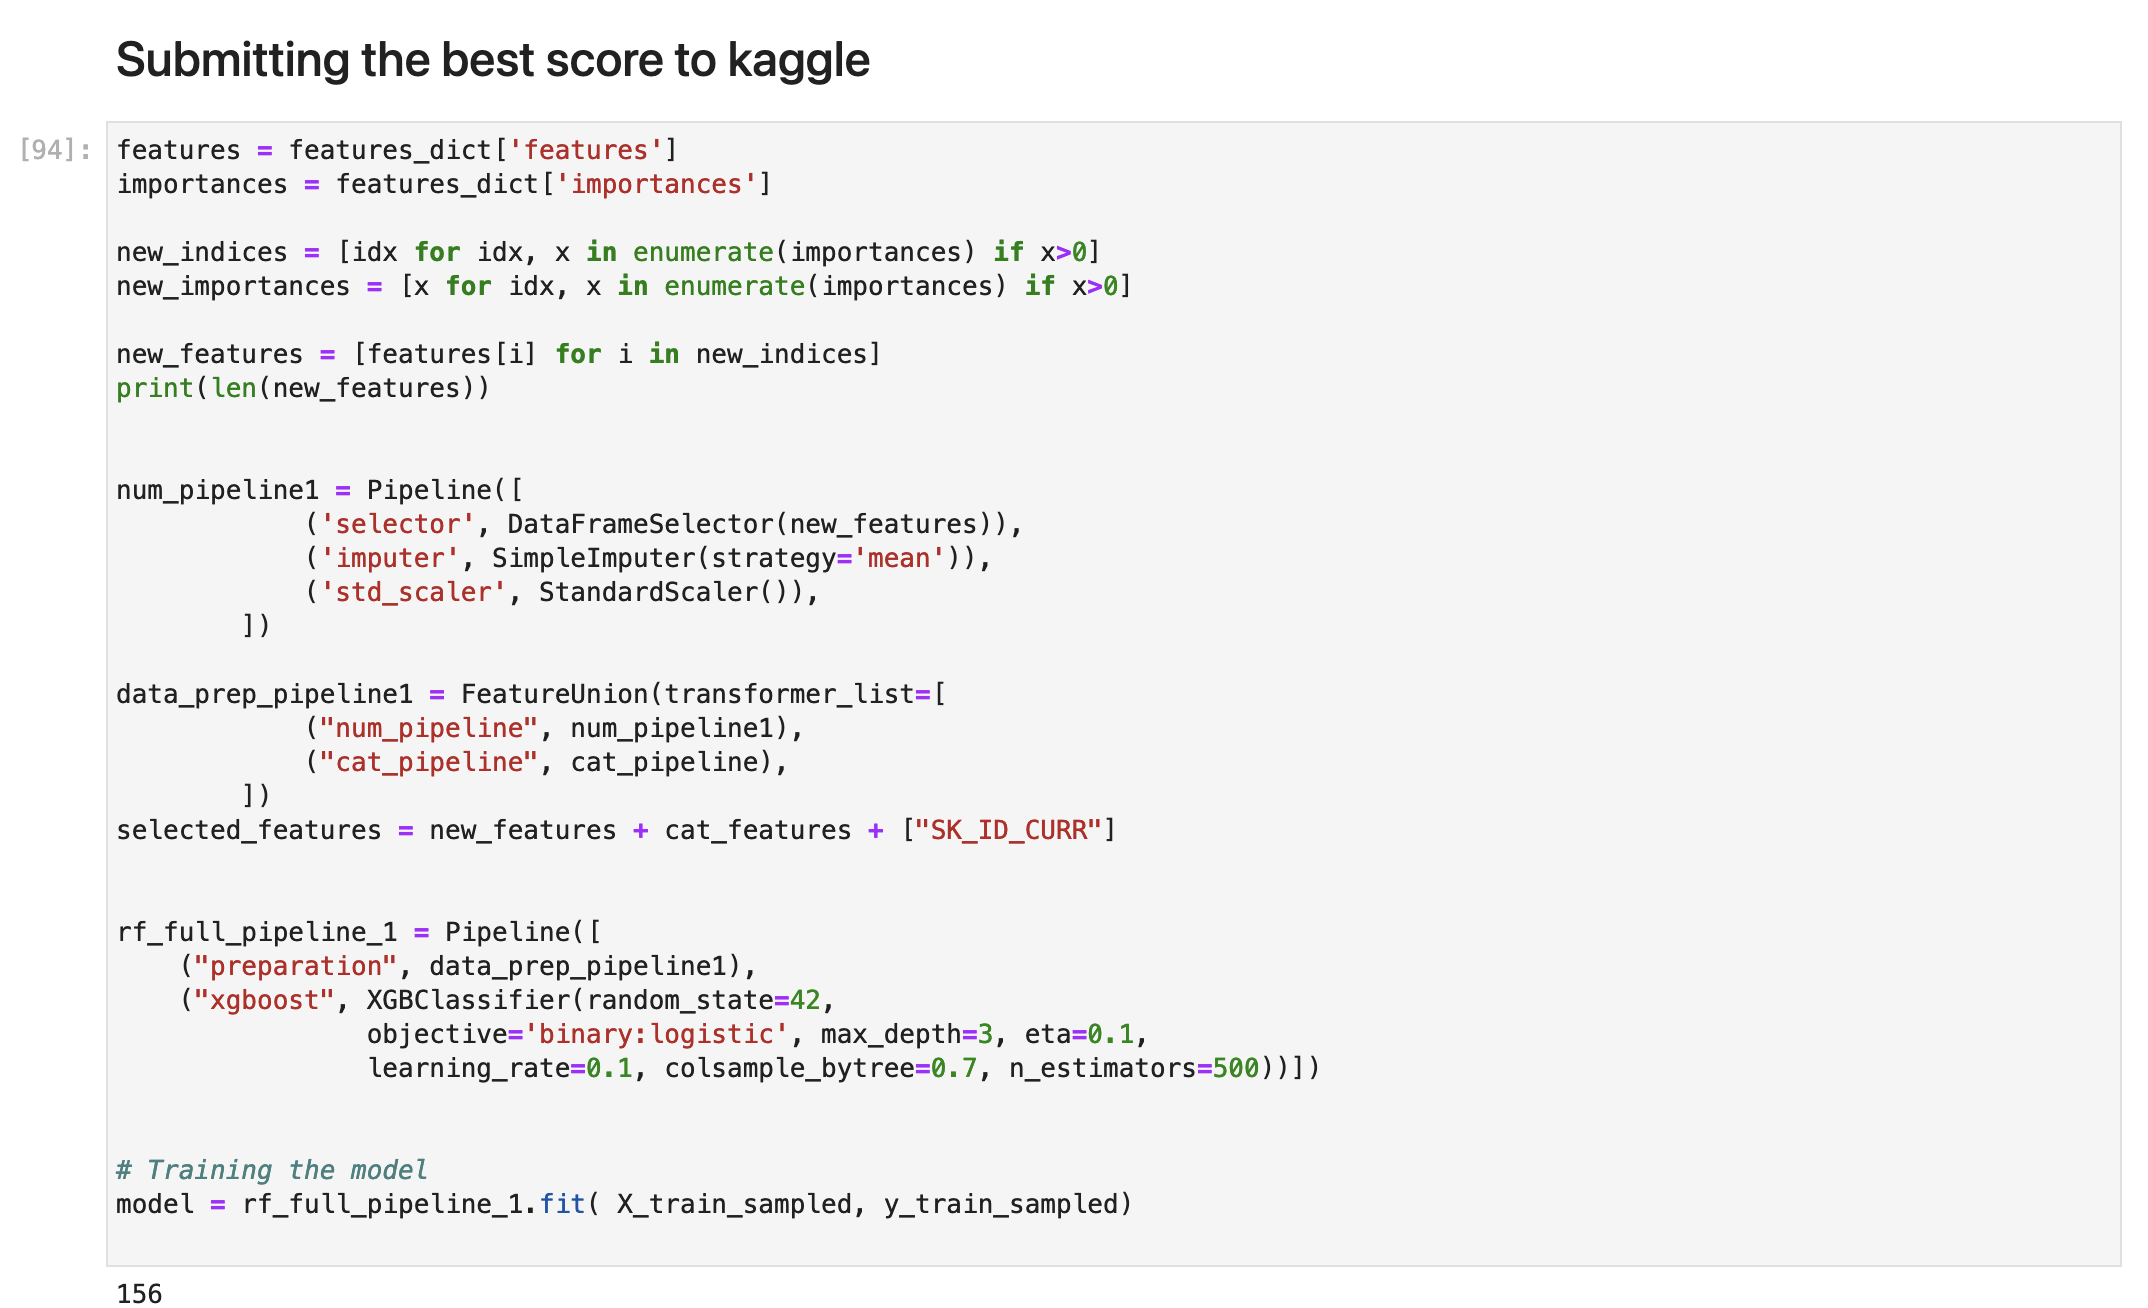

In [47]:
fig = Image(filename='./Kaggle Submission Code.png')
fig

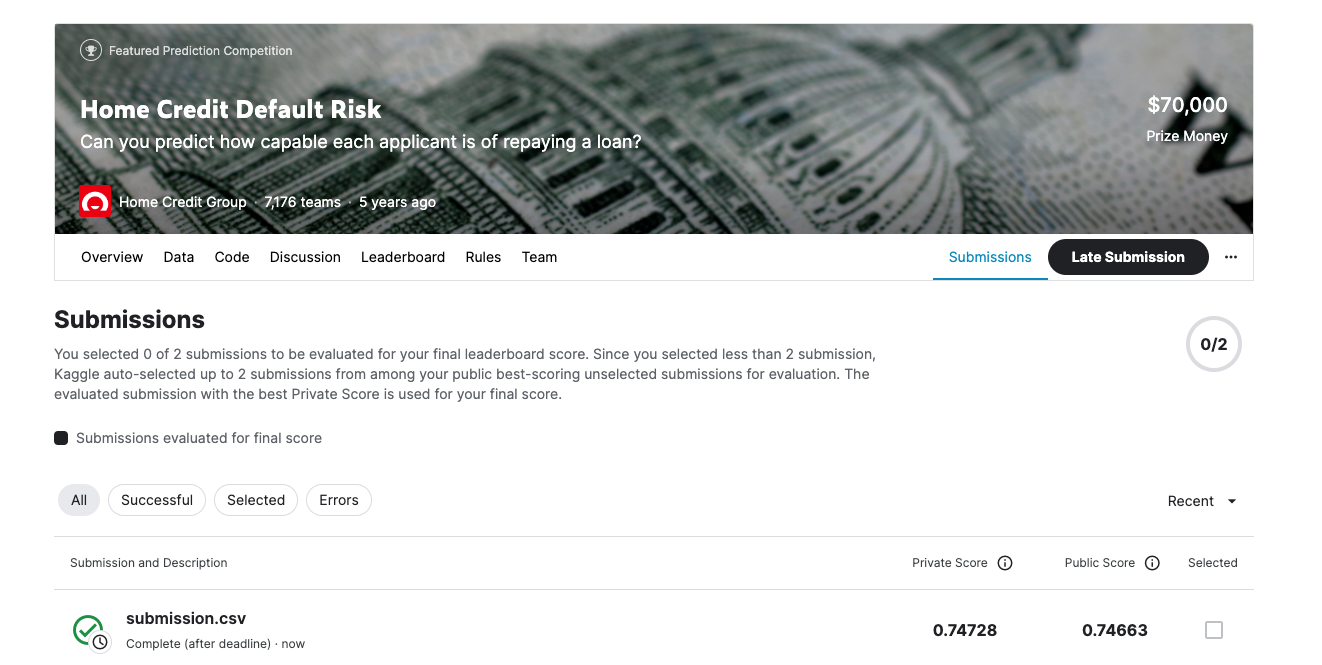

In [48]:
fig = Image(filename='./Kaggle Final Submission.png')
fig